In [1]:
from bicpy.util import *
from bicpy.calc import *
from dask.distributed import wait

client=get_rmm_client()

root_path='/home/yuninze/res'
data_name='uiop.zarr'

storage=init_zarr(root_path=root_path, data_name=data_name)

In [2]:
expr=to_da(storage.expr).map_blocks(cp.asarray)
_=wait(expr.persist())
expr

dask.array<asarray, shape=(120, 37637567), dtype=int8, chunksize=(20, 5880870), chunktype=cupy.ndarray>

In [4]:
expr_nonconstant_ind=(da.var(expr,axis=0)==0)
expr_nonconstant=expr[:, expr_nonconstant_ind]

In [5]:
expr_nonconstant=expr_nonconstant.map_blocks(cp.asnumpy)
_=wait(expr_nonconstant.persist())

In [7]:
expr_nonconstant=to_da(storage.result.expr_nonconstant)

In [8]:
expr_nonconstant

dask.array<array, shape=(120, 23214236), dtype=int8, chunksize=(24, 4352670), chunktype=numpy.ndarray>

In [ ]:
write_array(storage,('/result/expr_nonconstant',expr_nonconstant.compute()))

ㅡㅡㅡㅡㅡ Created name='/result/expr_nonconstant' of (120, 23214236), int8 


[('/result/expr_nonconstant', (120, 23214236))]

In [4]:
result_svd=get_svd(expr_nonconstant_stick, n=30, backend='dask')
result_svd_v=result_svd[2].compute()

2024-12-15 02:00:37,414 - distributed.worker.memory - WARNING - Worker is at 81% memory usage. Pausing worker.  Process memory: 25.39 GiB -- Worker memory limit: 31.11 GiB
2024-12-15 02:00:44,545 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 28.01 GiB -- Worker memory limit: 31.11 GiB
2024-12-15 02:00:54,572 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 28.16 GiB -- Worker memory limit: 31.11 GiB
2024-12-15 02:01:04,573 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memo

In [8]:
write_array(storage,('/result/expr_nonconstant_svd',result_svd_v))

ㅡㅡㅡㅡㅡ Created name='/result/expr_nonconstant_svd' of (30, 23214236), float64 


[('/result/expr_nonconstant_svd', (30, 23214236))]

In [2]:
expr_compressed=to_da(storage['/result/expr_nonconstant_svd'],thin=True)

In [6]:
result_pca=lap(pca, darr=expr_compressed)
result_pca_coord=result_pca[1].compute()

/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/distributed/client.py:3163: UserWarning: Sending large graph of size 177.12 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/distributed/client.py:3163: UserWarning: Sending large graph of size 376.38 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


ㅡㅡㅡㅡㅡ <function pca at 0x75e90fa33b50> Took 4963.0 s


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/distributed/client.py:3163: UserWarning: Sending large graph of size 531.34 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


In [8]:
write_array(storage,('/result/coord_2d',result_pca_coord))

ㅡㅡㅡㅡㅡ Created name='/result/coord_2d' of (30, 2), float64 


[('/result/coord_2d', (30, 2))]

ㅡㅡㅡㅡㅡ Attempting to cluster (30, 23214236), float64, 5313MB for cluster_count=2, component_count=20


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/dask/base.py:1402: UserWarning: Running on a single-machine scheduler when a distributed client is active might lead to unexpected results.
  warnings.warn(


ㅡㅡㅡㅡㅡ Clustring took 9.0 s 
ㅡㅡㅡㅡㅡ Scoring took 21.0 s 
ㅡㅡㅡㅡㅡ Attempting to cluster (30, 23214236), float64, 5313MB for cluster_count=4, component_count=20


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/dask/base.py:1402: UserWarning: Running on a single-machine scheduler when a distributed client is active might lead to unexpected results.
  warnings.warn(


ㅡㅡㅡㅡㅡ Clustring took 8.0 s 
ㅡㅡㅡㅡㅡ Scoring took 58.0 s 
ㅡㅡㅡㅡㅡ Attempting to cluster (30, 23214236), float64, 5313MB for cluster_count=6, component_count=20


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/dask/base.py:1402: UserWarning: Running on a single-machine scheduler when a distributed client is active might lead to unexpected results.
  warnings.warn(


ㅡㅡㅡㅡㅡ Clustring took 13.0 s 
ㅡㅡㅡㅡㅡ Scoring took 57.0 s 
ㅡㅡㅡㅡㅡ Attempting to cluster (30, 23214236), float64, 5313MB for cluster_count=8, component_count=20


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/dask_ml/cluster/spectral.py:234: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  X_keep = X[keep].rechunk(X.shape).persist()
Found fewer than 8 clusters in init (found 4).


ㅡㅡㅡㅡㅡ Clustring took 16.0 s 
ㅡㅡㅡㅡㅡ Scoring took 85.0 s 
ㅡㅡㅡㅡㅡ Attempting to cluster (30, 23214236), float64, 5313MB for cluster_count=10, component_count=20


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/dask_ml/cluster/spectral.py:234: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  X_keep = X[keep].rechunk(X.shape).persist()
Found fewer than 10 clusters in init (found 6).


ㅡㅡㅡㅡㅡ Clustring took 25.0 s 
ㅡㅡㅡㅡㅡ Scoring took 58.0 s 


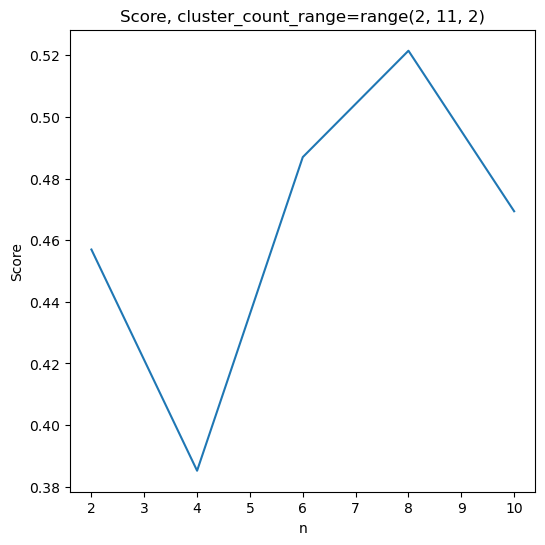

In [4]:
result_cluster=cluster_nx_iter(
  darr=expr_compressed,
  cluster_count_range=range(2,11,2),
  scoring=True,
  component_count=20
)

(<Figure size 800x800 with 1 Axes>, <Axes: xlabel='Xr: X0', ylabel='Xr: X1'>)

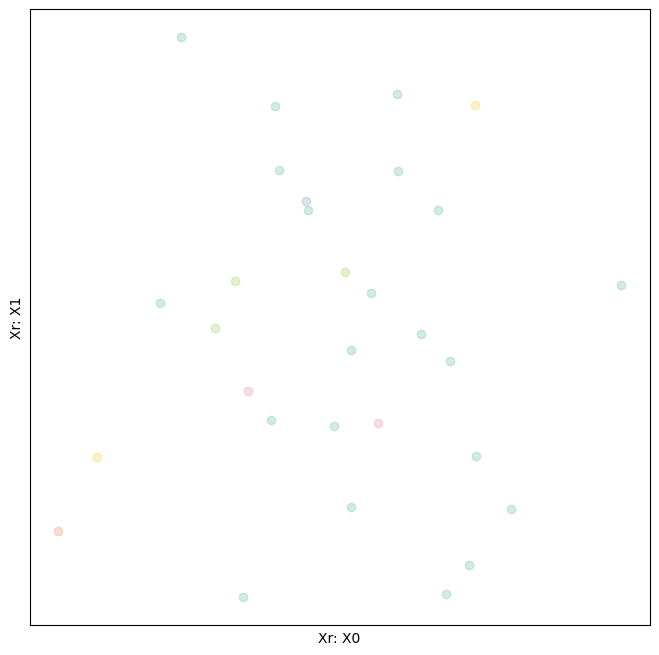

In [15]:
cluster_plot(result_pca_coord, result_cluster[0][6][1].labels_)

In [19]:
expr_compressed_cp=cp.asarray(expr_compressed,dtype='f4')

ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 150, 'n_neighbors': 1000000, 'n_iter': 100, 'learning_rate': 1000.0}) 
[W] [07:16:54.211007] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 150 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 500, 'n_neighbors': 100000, 'n_iter': 100, 'learning_rate': 74.98942093324558}) 
[W] [07:16:58.400755] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 500 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 700, 'n_neighbors': 10000000, 'n_iter': 100, 'learning_rate': 74.98942093324558}) 
[W] [07:17:02.983220] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 700 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 500, 'n_neighbors': 1000000, 'n_iter': 1000, 'learning_rate': 1000.0}) 
[W] [07:17:07.258359] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 500 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 950, 'n_neighbors': 10000000, 'n_iter': 100, 'learning_rate': 74.98942093324558}) 
[W] [07:17:11.662902] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 950 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 250, 'n_neighbors': 1000000000, 'n_iter': 1000, 'learning_rate': 31.622776601683793}) 
[W] [07:17:15.812673] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 250 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 400, 'n_neighbors': 1000000, 'n_iter': 10000, 'learning_rate': 74.98942093324558}) 
[W] [07:17:19.965688] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 400 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 750, 'n_neighbors': 100000, 'n_iter': 100, 'learning_rate': 1000.0}) 
[W] [07:17:24.378509] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 750 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 600, 'n_neighbors': 100000000, 'n_iter': 100, 'learning_rate': 421.6965034285823}) 
[W] [07:17:28.434198] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 600 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 200, 'n_neighbors': 100000000, 'n_iter': 100, 'learning_rate': 31.622776601683793}) 
[W] [07:17:32.430697] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 200 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 150, 'n_neighbors': 100000000, 'n_iter': 1000, 'learning_rate': 177.82794100389228}) 
[W] [07:17:36.725498] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 150 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 500, 'n_neighbors': 1000000, 'n_iter': 1000, 'learning_rate': 31.622776601683793}) 
[W] [07:17:40.982713] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 500 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 600, 'n_neighbors': 10000000, 'n_iter': 100, 'learning_rate': 177.82794100389228}) 
[W] [07:17:45.179437] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 600 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 50, 'n_neighbors': 100000000, 'n_iter': 10000, 'learning_rate': 1000.0}) 
[W] [07:17:49.499182] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 50 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 450, 'n_neighbors': 1000000, 'n_iter': 10000, 'learning_rate': 31.622776601683793}) 
[W] [07:17:54.304246] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 450 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 150, 'n_neighbors': 100000, 'n_iter': 1000, 'learning_rate': 421.6965034285823}) 
[W] [07:17:59.064863] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 150 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 600, 'n_neighbors': 100000, 'n_iter': 10000, 'learning_rate': 177.82794100389228}) 
[W] [07:18:03.191954] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 600 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 550, 'n_neighbors': 10000000, 'n_iter': 1000, 'learning_rate': 74.98942093324558}) 
[W] [07:18:07.351573] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 550 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 950, 'n_neighbors': 10000000, 'n_iter': 100, 'learning_rate': 177.82794100389228}) 
[W] [07:18:11.416786] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 950 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 500, 'n_neighbors': 100000000, 'n_iter': 1000, 'learning_rate': 31.622776601683793}) 
[W] [07:18:16.306473] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 500 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 1000, 'n_neighbors': 10000, 'n_iter': 100, 'learning_rate': 74.98942093324558}) 
[W] [07:18:20.298686] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 1000 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)
/tmp/ipykernel_7962/3346909510.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and 

ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 250, 'n_neighbors': 10000000, 'n_iter': 10000, 'learning_rate': 421.6965034285823}) 
[W] [07:18:24.032981] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 250 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 300, 'n_neighbors': 100000000, 'n_iter': 10000, 'learning_rate': 1000.0}) 
[W] [07:18:27.853137] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 300 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 600, 'n_neighbors': 10000, 'n_iter': 1000, 'learning_rate': 1000.0}) 
[W] [07:18:32.082142] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 600 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 450, 'n_neighbors': 10000000, 'n_iter': 1000, 'learning_rate': 421.6965034285823}) 
[W] [07:18:36.231825] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 450 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 450, 'n_neighbors': 10000000, 'n_iter': 10000, 'learning_rate': 31.622776601683793}) 
[W] [07:18:40.194430] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 450 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 650, 'n_neighbors': 10000000, 'n_iter': 10000, 'learning_rate': 177.82794100389228}) 
[W] [07:18:44.161146] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 650 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 150, 'n_neighbors': 10000, 'n_iter': 100, 'learning_rate': 1000.0}) 
[W] [07:18:48.550744] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 150 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 850, 'n_neighbors': 100000000, 'n_iter': 100, 'learning_rate': 1000.0}) 
[W] [07:18:52.200504] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 850 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 450, 'n_neighbors': 100000000, 'n_iter': 100, 'learning_rate': 1000.0}) 
[W] [07:18:55.842396] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 450 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 250, 'n_neighbors': 100000000, 'n_iter': 100, 'learning_rate': 1000.0}) 
[W] [07:19:00.016525] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 250 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 100, 'n_neighbors': 1000000, 'n_iter': 1000, 'learning_rate': 74.98942093324558}) 
[W] [07:19:03.651965] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 100 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 1000, 'n_neighbors': 100000000, 'n_iter': 1000, 'learning_rate': 31.622776601683793}) 
[W] [07:19:07.619700] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 1000 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 800, 'n_neighbors': 10000, 'n_iter': 100, 'learning_rate': 177.82794100389228}) 
[W] [07:19:11.666173] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 800 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 550, 'n_neighbors': 100000, 'n_iter': 10000, 'learning_rate': 74.98942093324558}) 
[W] [07:19:15.441804] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 550 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 550, 'n_neighbors': 1000000, 'n_iter': 10000, 'learning_rate': 177.82794100389228}) 
[W] [07:19:19.305384] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 550 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 150, 'n_neighbors': 1000000000, 'n_iter': 10000, 'learning_rate': 421.6965034285823}) 
[W] [07:19:24.168360] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 150 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 750, 'n_neighbors': 1000000000, 'n_iter': 100, 'learning_rate': 177.82794100389228}) 
[W] [07:19:27.834986] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 750 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 850, 'n_neighbors': 100000, 'n_iter': 10000, 'learning_rate': 421.6965034285823}) 
[W] [07:19:31.686720] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 850 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 550, 'n_neighbors': 100000000, 'n_iter': 1000, 'learning_rate': 74.98942093324558}) 
[W] [07:19:35.505948] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 550 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 1000, 'n_neighbors': 100000000, 'n_iter': 100, 'learning_rate': 1000.0}) 
[W] [07:19:39.121333] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 1000 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 300, 'n_neighbors': 10000000, 'n_iter': 1000, 'learning_rate': 421.6965034285823}) 
[W] [07:19:42.750321] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 300 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 150, 'n_neighbors': 10000, 'n_iter': 10000, 'learning_rate': 31.622776601683793}) 
[W] [07:19:46.800603] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 150 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 850, 'n_neighbors': 100000000, 'n_iter': 100, 'learning_rate': 74.98942093324558}) 
[W] [07:19:50.756974] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 850 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 500, 'n_neighbors': 10000, 'n_iter': 1000, 'learning_rate': 1000.0}) 
[W] [07:19:54.432848] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 500 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 400, 'n_neighbors': 10000, 'n_iter': 100, 'learning_rate': 74.98942093324558}) 
[W] [07:19:58.260428] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 400 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 450, 'n_neighbors': 10000000, 'n_iter': 100, 'learning_rate': 1000.0}) 
[W] [07:20:01.829112] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 450 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 150, 'n_neighbors': 1000000000, 'n_iter': 100, 'learning_rate': 31.622776601683793}) 
[W] [07:20:05.451766] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 150 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 650, 'n_neighbors': 10000000, 'n_iter': 10000, 'learning_rate': 421.6965034285823}) 
[W] [07:20:09.193638] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 650 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 400, 'n_neighbors': 1000000000, 'n_iter': 100, 'learning_rate': 1000.0}) 
[W] [07:20:12.788744] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 400 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 900, 'n_neighbors': 10000000, 'n_iter': 10000, 'learning_rate': 74.98942093324558}) 
[W] [07:20:16.302545] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 900 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 800, 'n_neighbors': 100000000, 'n_iter': 10000, 'learning_rate': 421.6965034285823}) 
[W] [07:20:20.001743] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 800 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 950, 'n_neighbors': 100000000, 'n_iter': 10000, 'learning_rate': 1000.0}) 
[W] [07:20:23.625405] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 950 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 100, 'n_neighbors': 10000, 'n_iter': 1000, 'learning_rate': 421.6965034285823}) 
[W] [07:20:27.207566] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 100 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 950, 'n_neighbors': 10000, 'n_iter': 100, 'learning_rate': 177.82794100389228}) 
[W] [07:20:31.693269] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 950 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 1000, 'n_neighbors': 10000, 'n_iter': 1000, 'learning_rate': 1000.0}) 
[W] [07:20:35.916812] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 1000 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 350, 'n_neighbors': 1000000, 'n_iter': 10000, 'learning_rate': 177.82794100389228}) 
[W] [07:20:39.650395] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 350 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 300, 'n_neighbors': 10000, 'n_iter': 1000, 'learning_rate': 31.622776601683793}) 
[W] [07:20:43.472505] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 300 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 50, 'n_neighbors': 100000, 'n_iter': 10000, 'learning_rate': 1000.0}) 
[W] [07:20:47.502367] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 50 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 750, 'n_neighbors': 10000, 'n_iter': 100, 'learning_rate': 421.6965034285823}) 
[W] [07:20:51.634460] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 750 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 400, 'n_neighbors': 1000000000, 'n_iter': 100, 'learning_rate': 421.6965034285823}) 
[W] [07:20:56.101938] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 400 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 250, 'n_neighbors': 1000000000, 'n_iter': 100, 'learning_rate': 74.98942093324558}) 
[W] [07:21:00.286052] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 250 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 50, 'n_neighbors': 10000000, 'n_iter': 100, 'learning_rate': 1000.0}) 
[W] [07:21:04.613566] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 50 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 950, 'n_neighbors': 1000000, 'n_iter': 100, 'learning_rate': 74.98942093324558}) 
[W] [07:21:08.553619] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 950 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 50, 'n_neighbors': 10000, 'n_iter': 10000, 'learning_rate': 177.82794100389228}) 
[W] [07:21:12.285449] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 50 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 1000, 'n_neighbors': 1000000, 'n_iter': 1000, 'learning_rate': 177.82794100389228}) 
[W] [07:21:16.107844] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 1000 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 1000, 'n_neighbors': 1000000000, 'n_iter': 10000, 'learning_rate': 31.622776601683793}) 
[W] [07:21:19.688471] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 1000 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 600, 'n_neighbors': 10000, 'n_iter': 10000, 'learning_rate': 74.98942093324558}) 
[W] [07:21:23.216022] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 600 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 800, 'n_neighbors': 1000000000, 'n_iter': 10000, 'learning_rate': 74.98942093324558}) 
[W] [07:21:27.254170] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 800 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 100, 'n_neighbors': 1000000, 'n_iter': 10000, 'learning_rate': 31.622776601683793}) 
[W] [07:21:31.271860] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 100 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 250, 'n_neighbors': 1000000000, 'n_iter': 1000, 'learning_rate': 177.82794100389228}) 
[W] [07:21:35.143553] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 250 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 150, 'n_neighbors': 1000000, 'n_iter': 10000, 'learning_rate': 74.98942093324558}) 
[W] [07:21:39.149842] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 150 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 400, 'n_neighbors': 100000000, 'n_iter': 100, 'learning_rate': 421.6965034285823}) 
[W] [07:21:42.729799] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 400 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 150, 'n_neighbors': 1000000, 'n_iter': 10000, 'learning_rate': 177.82794100389228}) 
[W] [07:21:46.972224] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 150 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 450, 'n_neighbors': 100000000, 'n_iter': 10000, 'learning_rate': 177.82794100389228}) 
[W] [07:21:50.692779] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 450 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 50, 'n_neighbors': 1000000, 'n_iter': 1000, 'learning_rate': 1000.0}) 
[W] [07:21:54.650777] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 50 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 450, 'n_neighbors': 100000000, 'n_iter': 100, 'learning_rate': 421.6965034285823}) 
[W] [07:21:58.571267] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 450 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 50, 'n_neighbors': 100000000, 'n_iter': 100, 'learning_rate': 74.98942093324558}) 
[W] [07:22:02.395853] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 50 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 350, 'n_neighbors': 100000000, 'n_iter': 10000, 'learning_rate': 31.622776601683793}) 
[W] [07:22:06.058103] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 350 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 650, 'n_neighbors': 1000000, 'n_iter': 1000, 'learning_rate': 1000.0}) 
[W] [07:22:09.998807] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 650 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 300, 'n_neighbors': 1000000000, 'n_iter': 100, 'learning_rate': 31.622776601683793}) 
[W] [07:22:13.793258] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 300 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 400, 'n_neighbors': 1000000, 'n_iter': 1000, 'learning_rate': 74.98942093324558}) 
[W] [07:22:17.927482] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 400 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 50, 'n_neighbors': 1000000000, 'n_iter': 1000, 'learning_rate': 74.98942093324558}) 
[W] [07:22:22.214315] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 50 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 200, 'n_neighbors': 100000000, 'n_iter': 1000, 'learning_rate': 421.6965034285823}) 
[W] [07:22:26.275871] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 200 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 700, 'n_neighbors': 100000000, 'n_iter': 100, 'learning_rate': 31.622776601683793}) 
[W] [07:22:30.035453] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 700 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 50, 'n_neighbors': 1000000, 'n_iter': 100, 'learning_rate': 177.82794100389228}) 
[W] [07:22:34.345982] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 50 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 900, 'n_neighbors': 100000000, 'n_iter': 1000, 'learning_rate': 1000.0}) 
[W] [07:22:38.011944] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 900 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 650, 'n_neighbors': 10000, 'n_iter': 100, 'learning_rate': 31.622776601683793}) 
[W] [07:22:42.065454] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 650 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 350, 'n_neighbors': 100000000, 'n_iter': 10000, 'learning_rate': 74.98942093324558}) 
[W] [07:22:45.914856] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 350 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 850, 'n_neighbors': 1000000000, 'n_iter': 1000, 'learning_rate': 31.622776601683793}) 
[W] [07:22:49.531947] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 850 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 300, 'n_neighbors': 100000, 'n_iter': 100, 'learning_rate': 421.6965034285823}) 
[W] [07:22:53.048478] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 300 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 900, 'n_neighbors': 100000, 'n_iter': 1000, 'learning_rate': 177.82794100389228}) 
[W] [07:22:56.633146] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 900 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 750, 'n_neighbors': 10000, 'n_iter': 1000, 'learning_rate': 74.98942093324558}) 
[W] [07:23:00.552423] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 750 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 1000, 'n_neighbors': 10000000, 'n_iter': 100, 'learning_rate': 421.6965034285823}) 
[W] [07:23:04.552817] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 1000 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 750, 'n_neighbors': 100000, 'n_iter': 100, 'learning_rate': 177.82794100389228}) 
[W] [07:23:08.445909] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 750 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 450, 'n_neighbors': 100000, 'n_iter': 10000, 'learning_rate': 177.82794100389228}) 
[W] [07:23:12.026203] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 450 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 750, 'n_neighbors': 1000000, 'n_iter': 1000, 'learning_rate': 74.98942093324558}) 
[W] [07:23:15.881202] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 750 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 450, 'n_neighbors': 10000, 'n_iter': 10000, 'learning_rate': 421.6965034285823}) 
[W] [07:23:19.455572] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 450 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 200, 'n_neighbors': 1000000, 'n_iter': 100, 'learning_rate': 1000.0}) 
[W] [07:23:23.152384] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 200 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 450, 'n_neighbors': 100000, 'n_iter': 100, 'learning_rate': 421.6965034285823}) 
[W] [07:23:26.753491] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 450 should be less than the # of datapoints = 30.
  ret = func(*args, **kwargs)


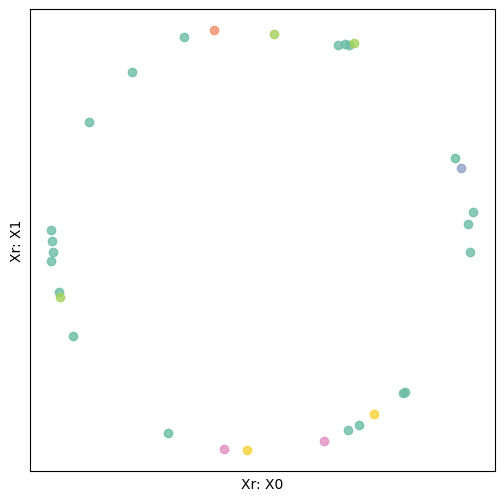

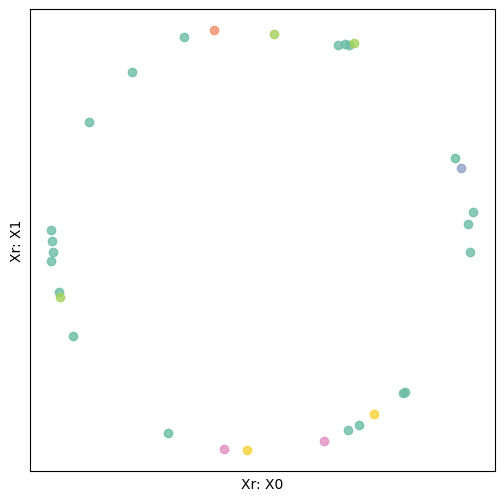

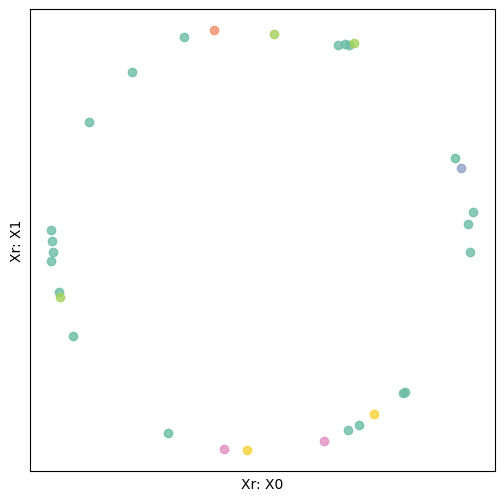

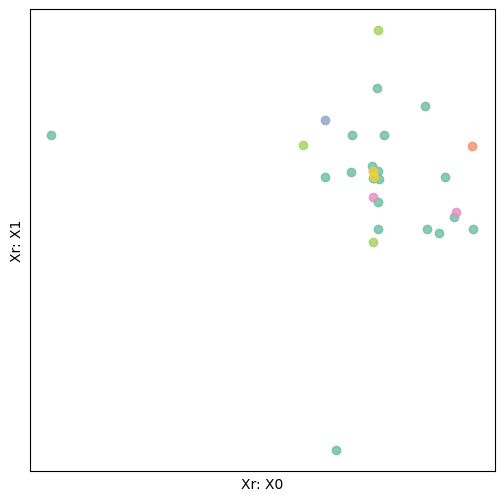

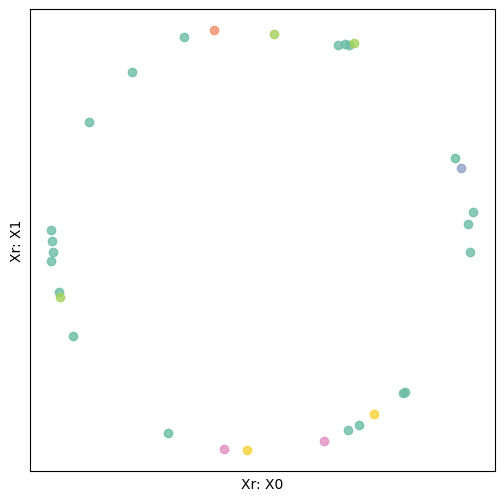

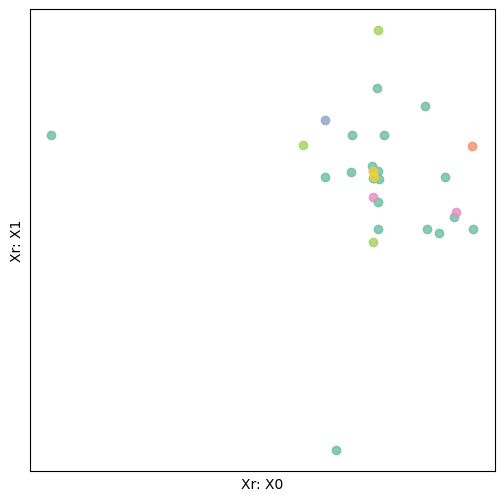

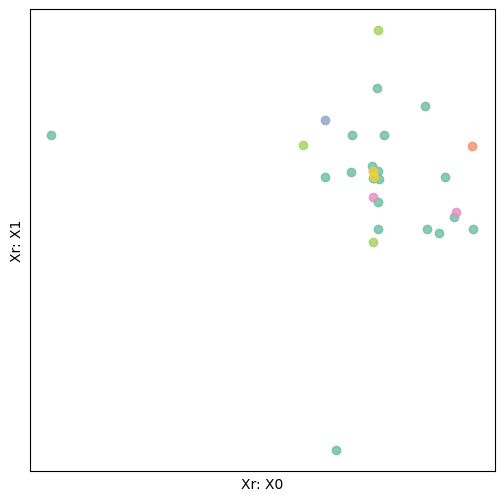

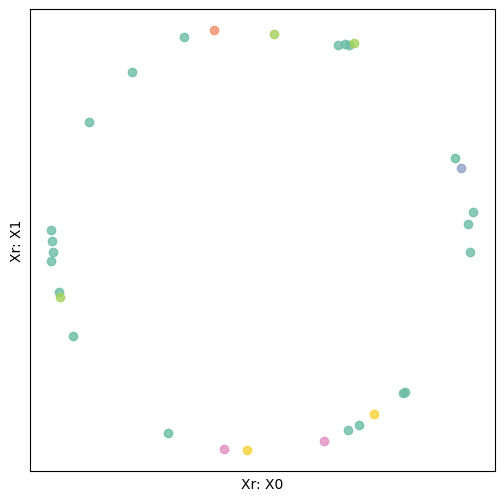

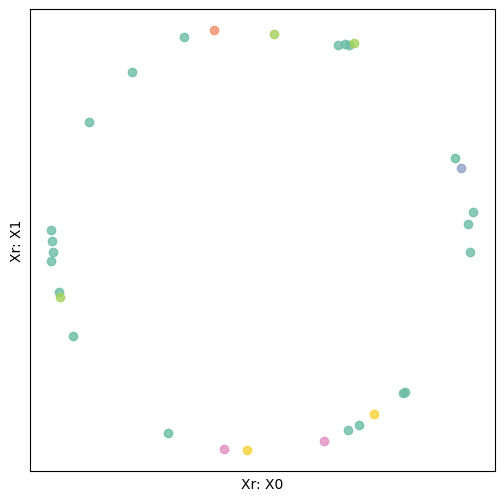

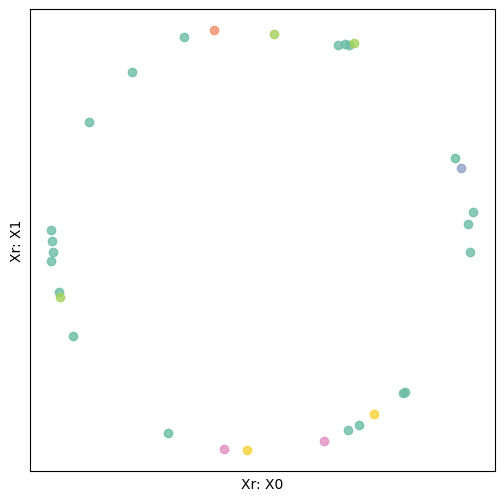

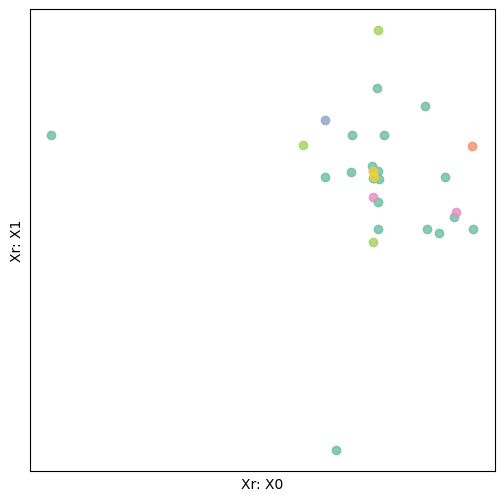

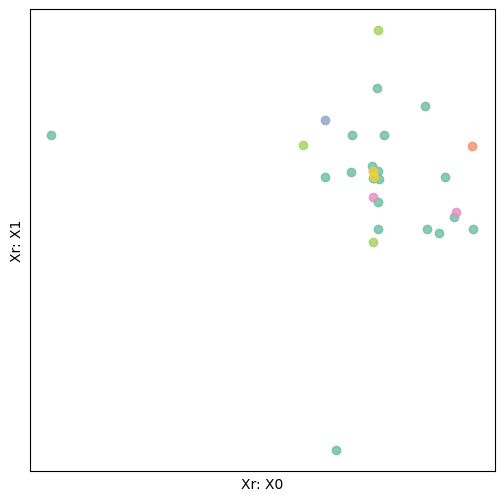

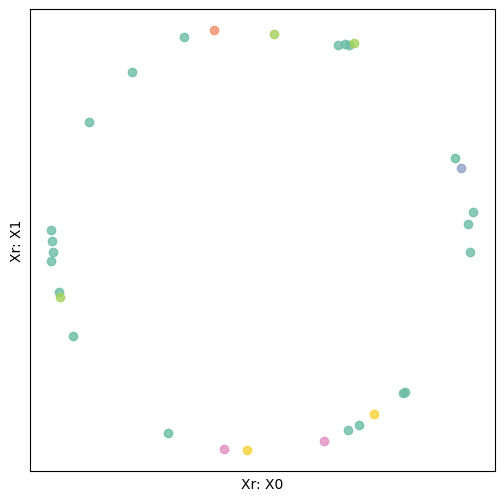

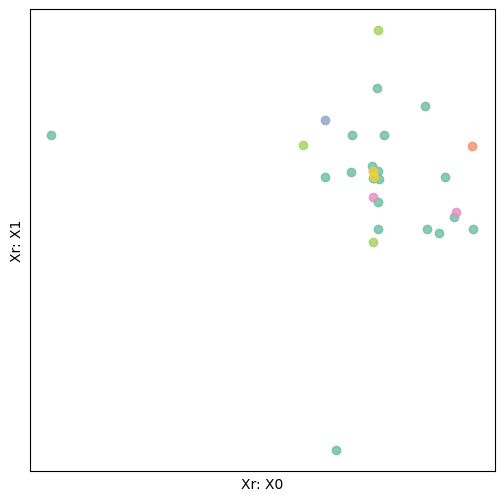

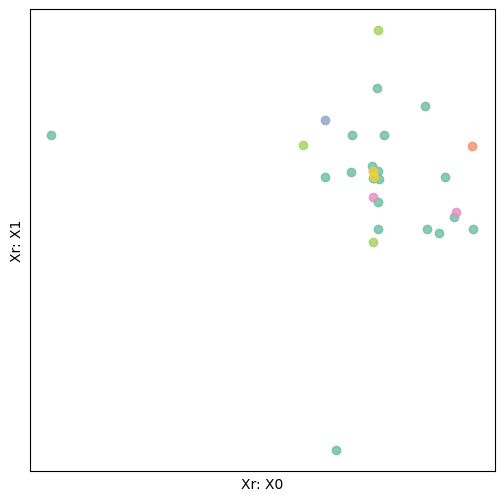

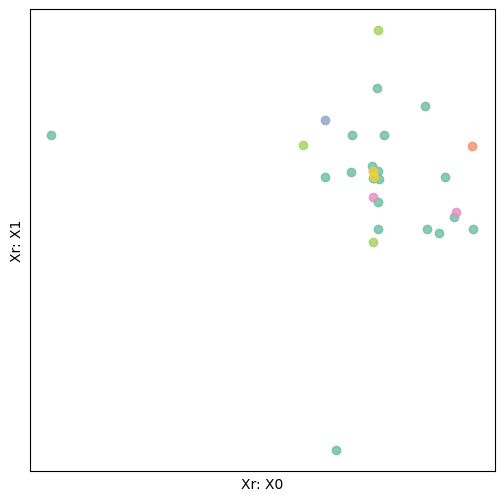

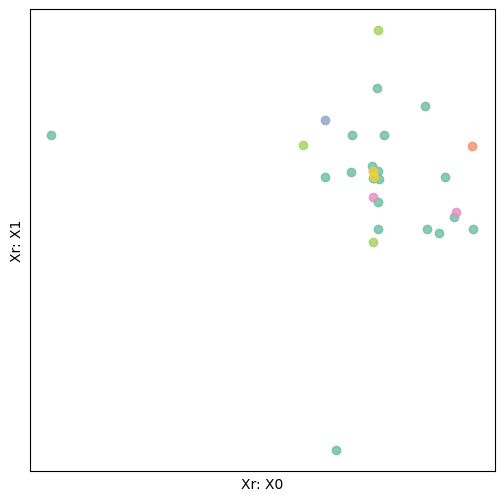

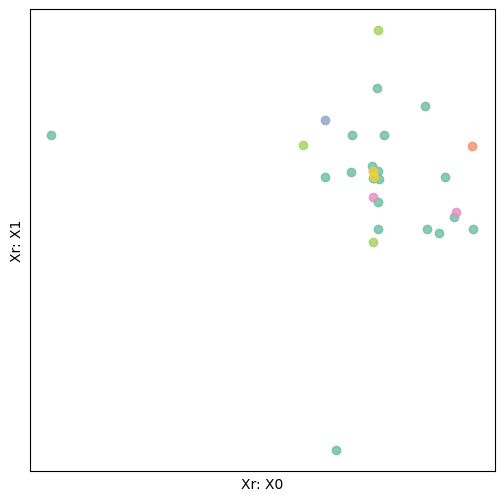

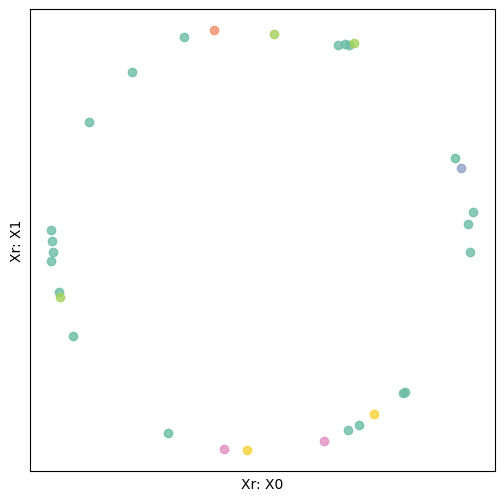

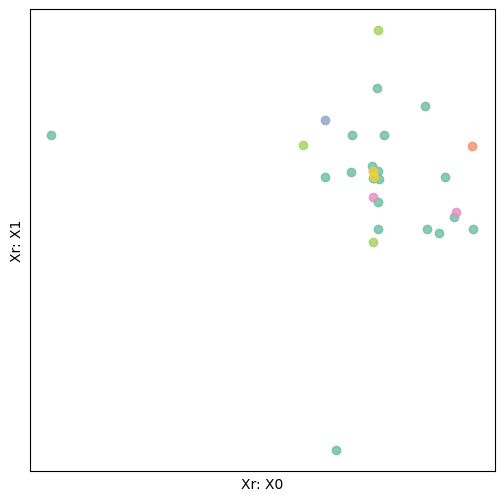

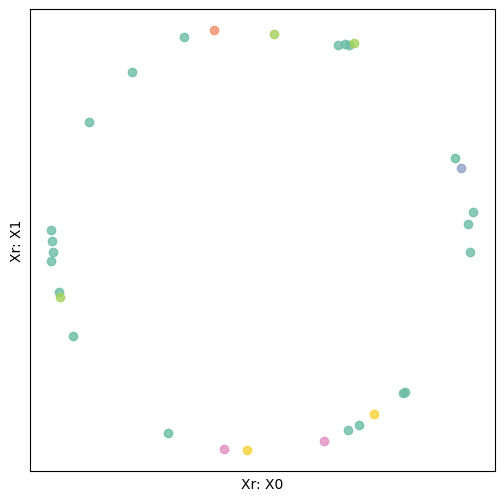

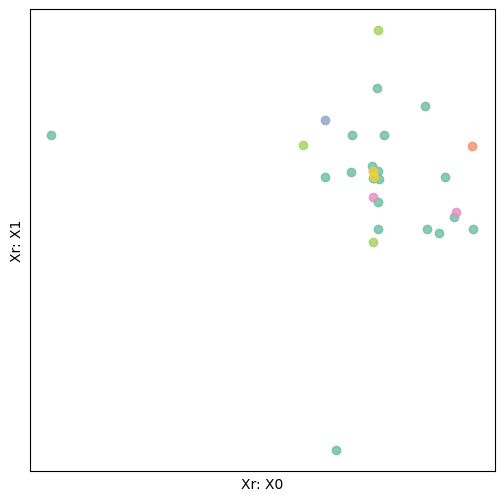

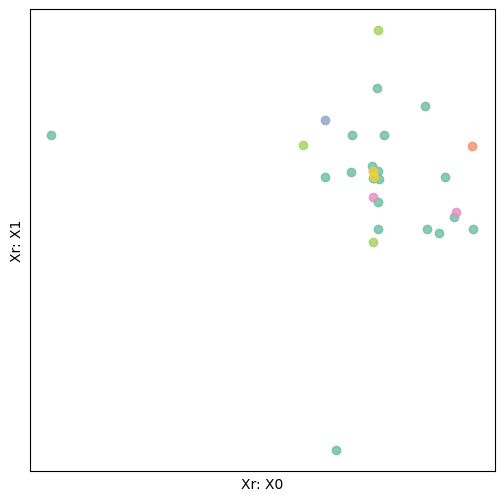

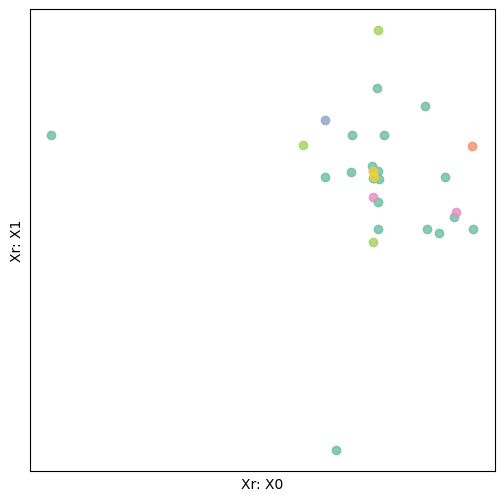

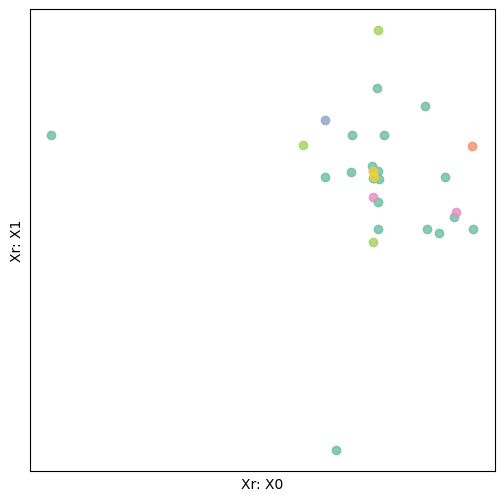

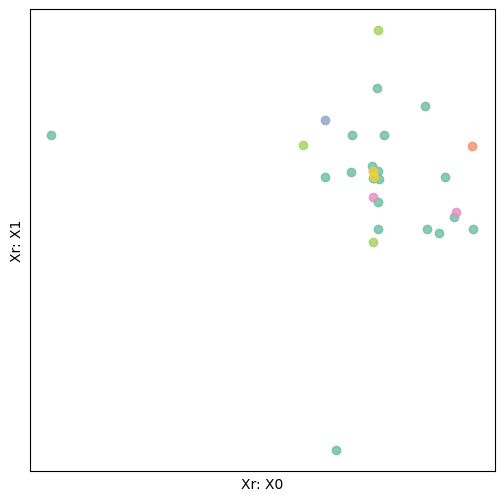

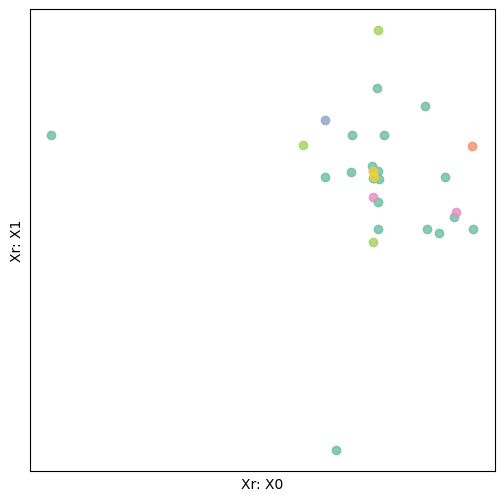

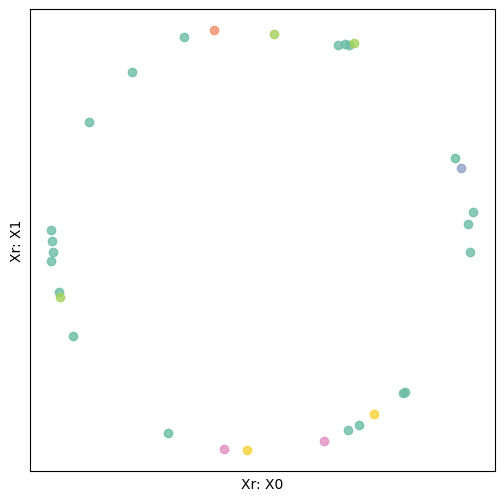

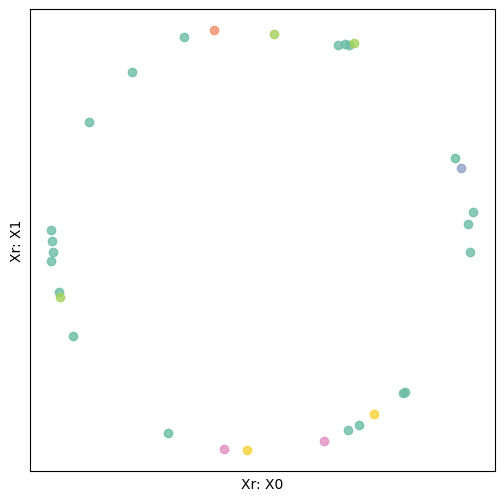

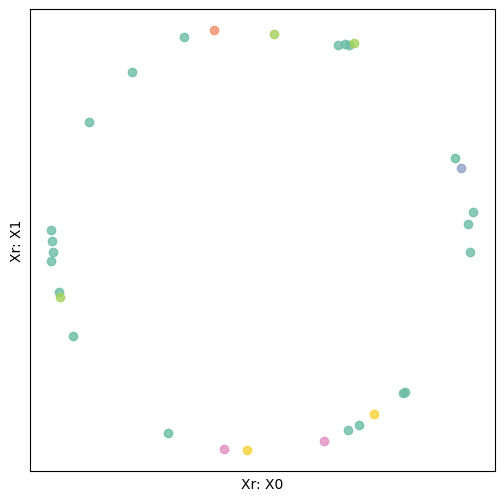

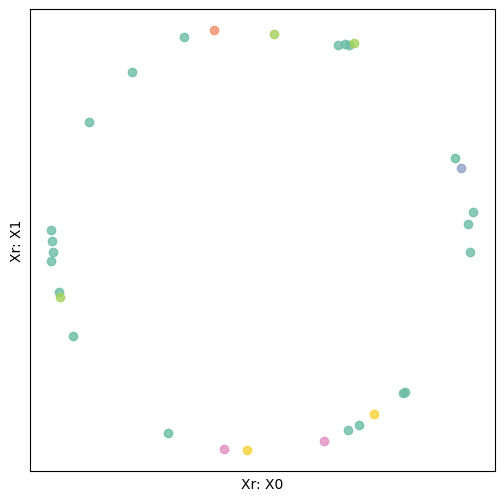

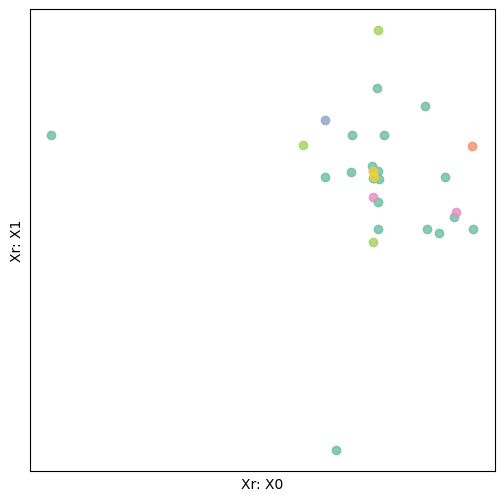

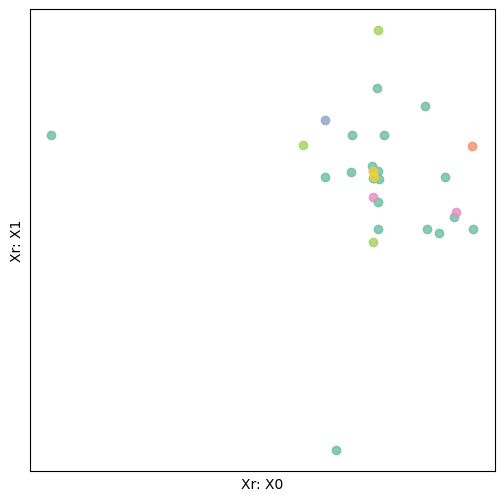

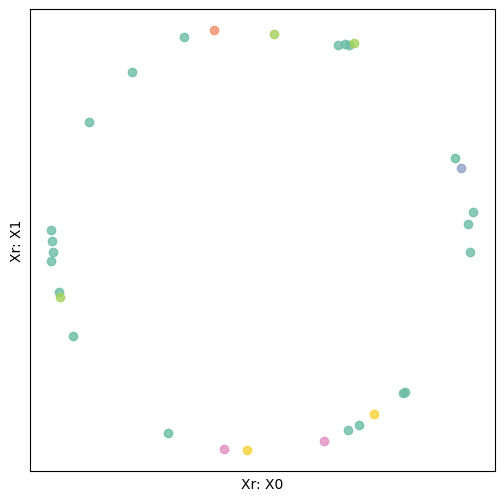

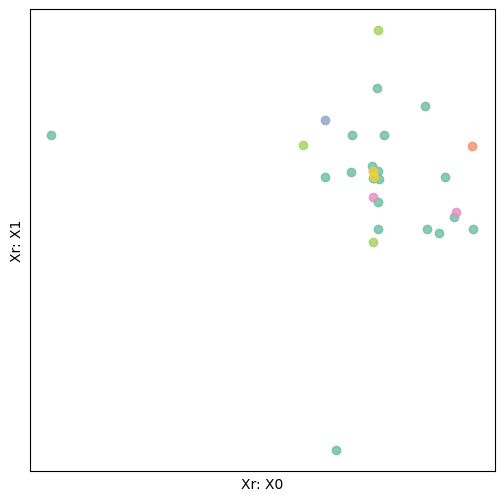

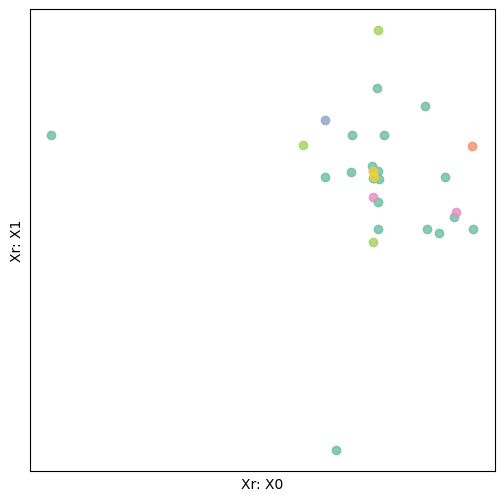

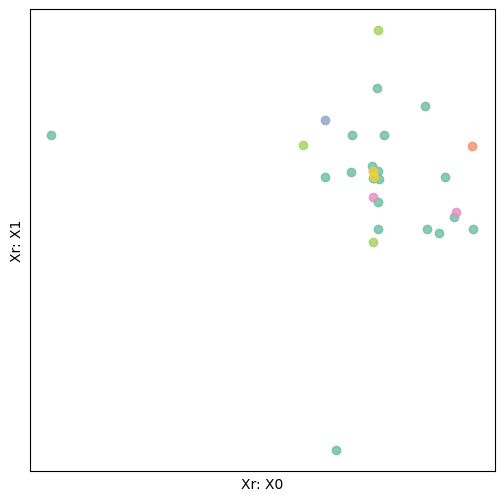

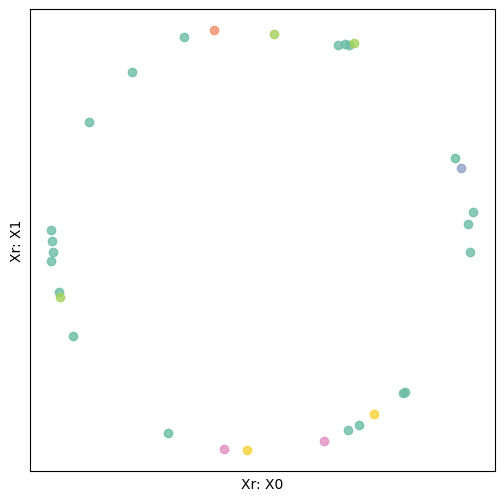

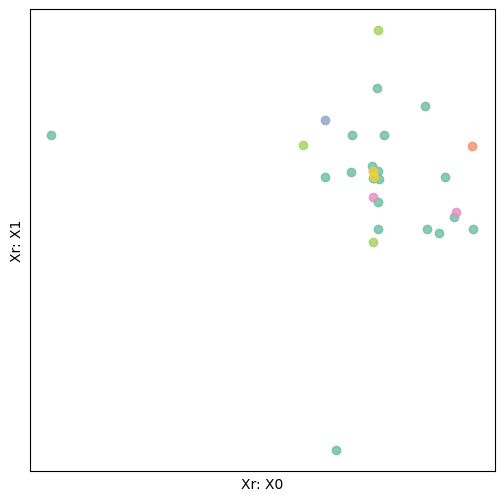

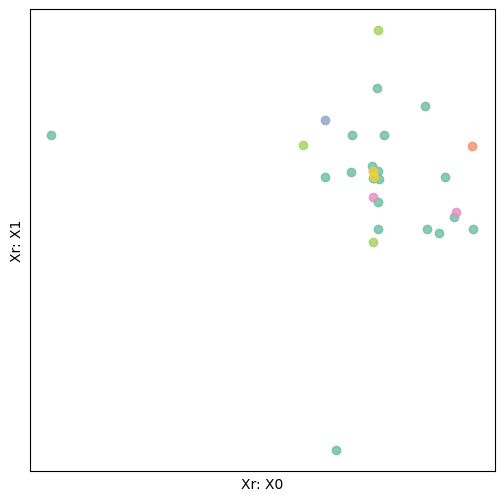

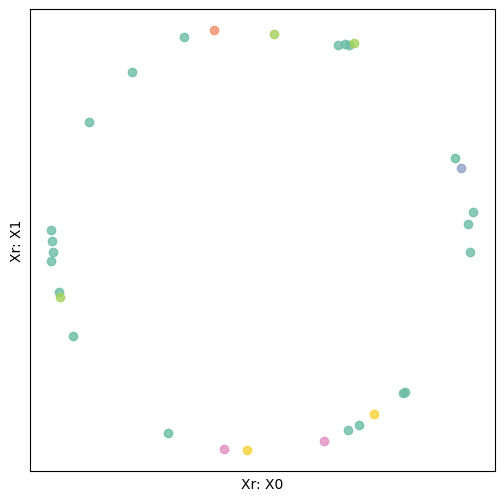

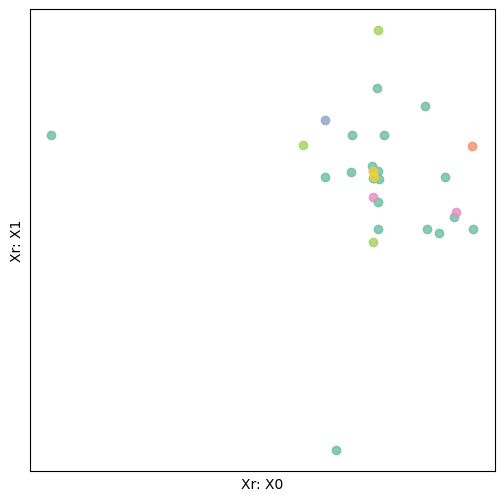

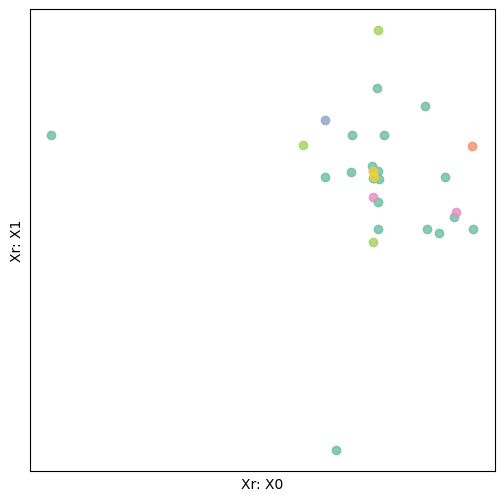

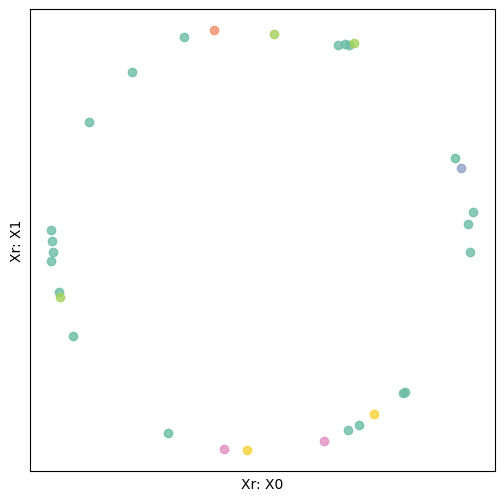

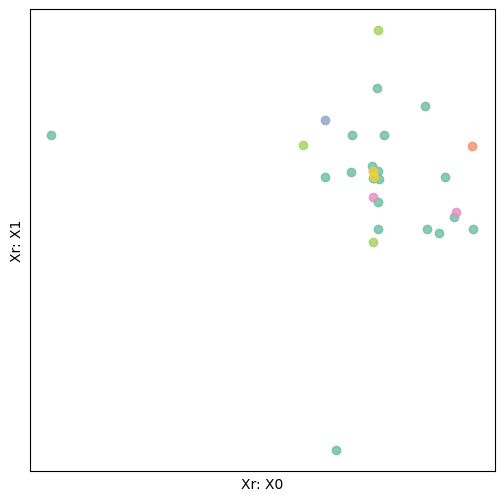

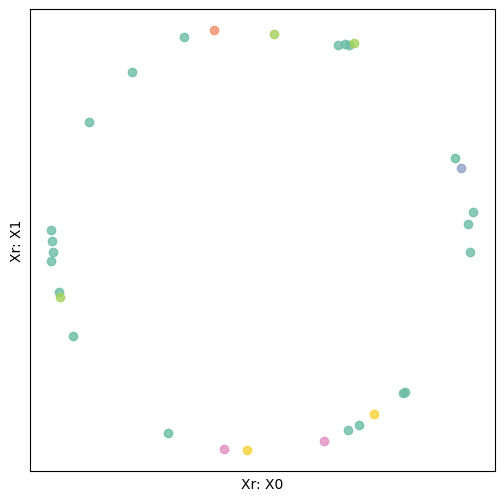

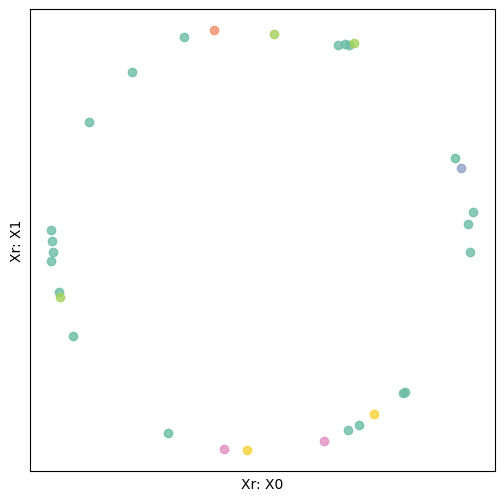

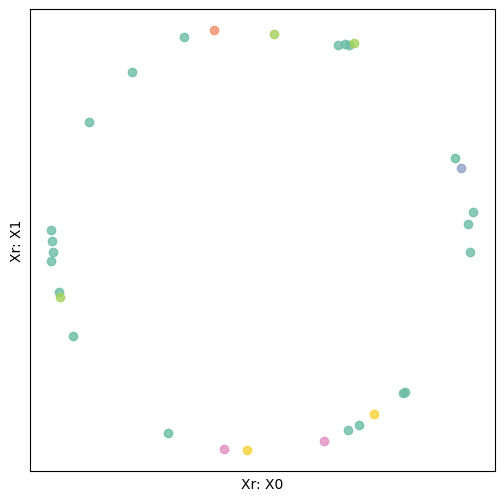

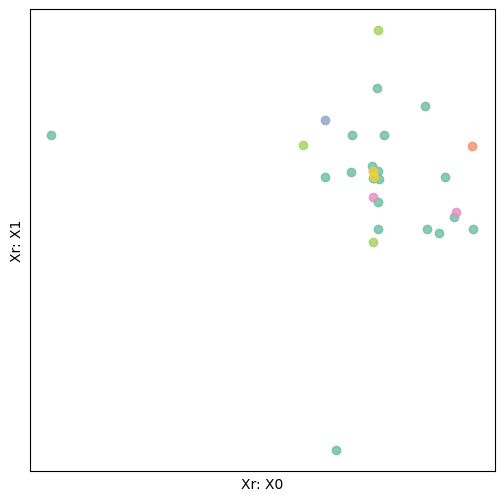

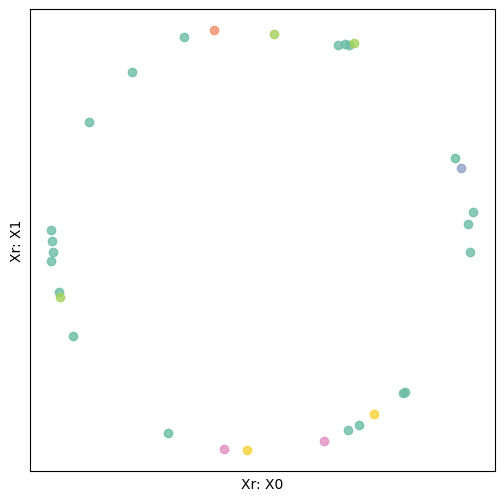

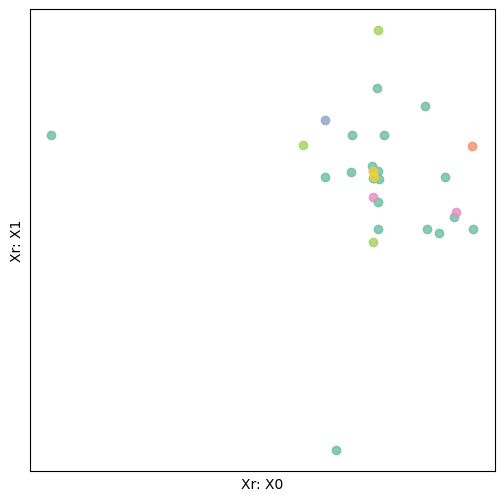

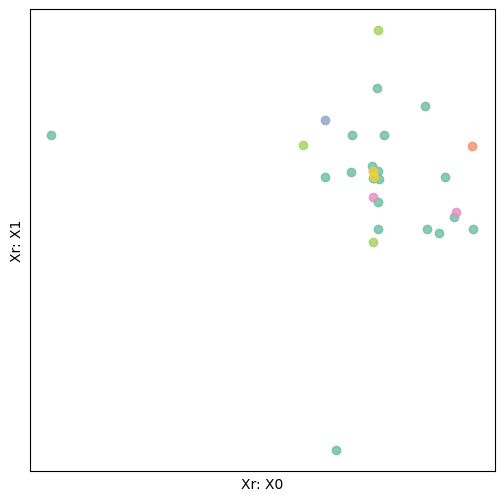

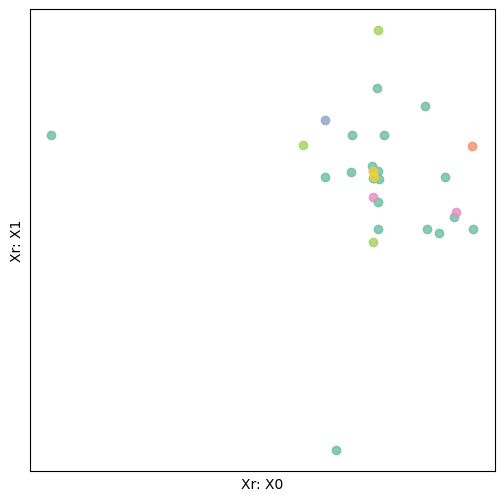

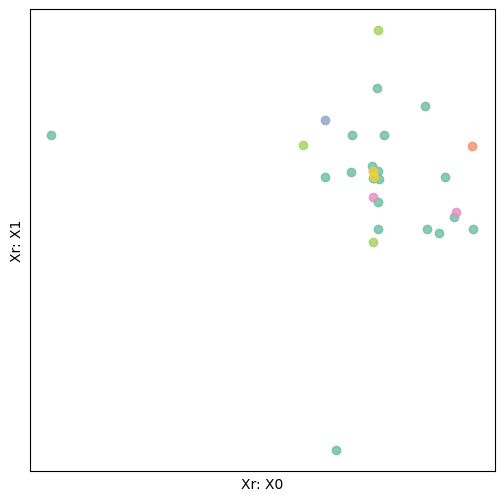

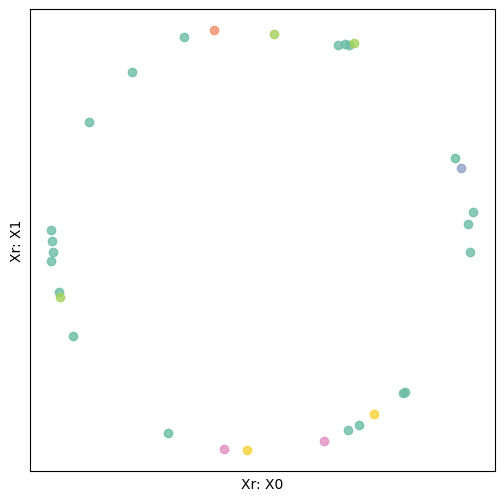

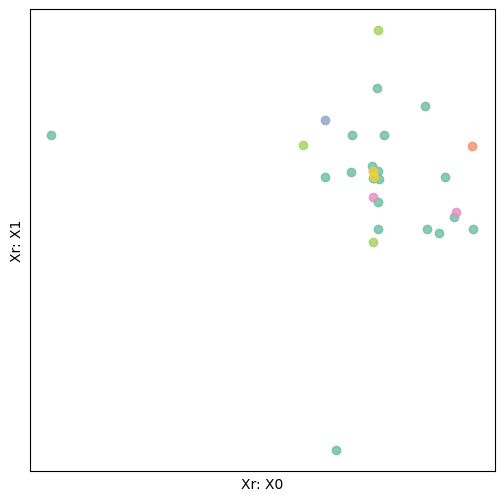

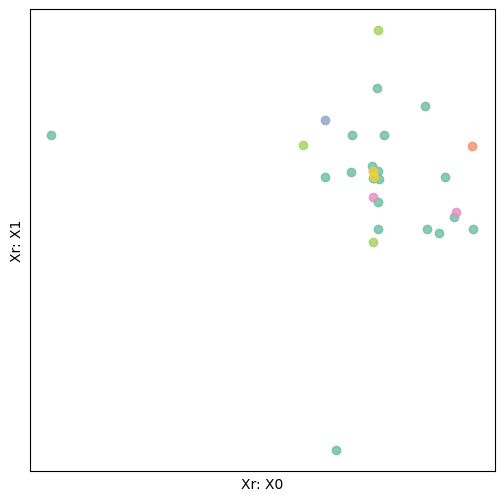

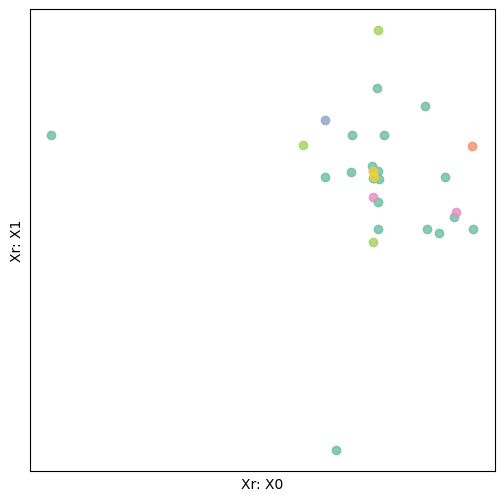

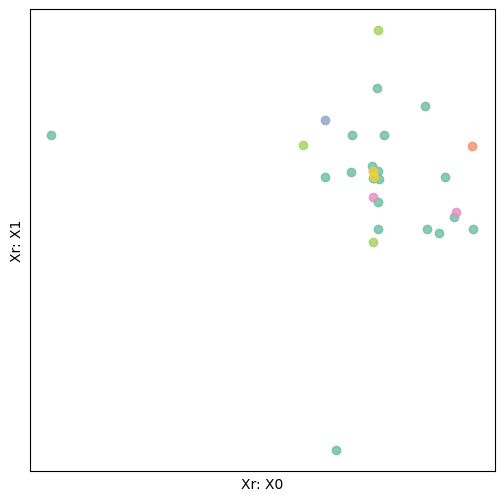

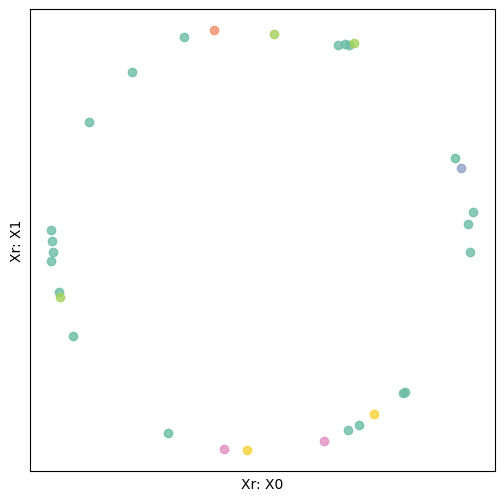

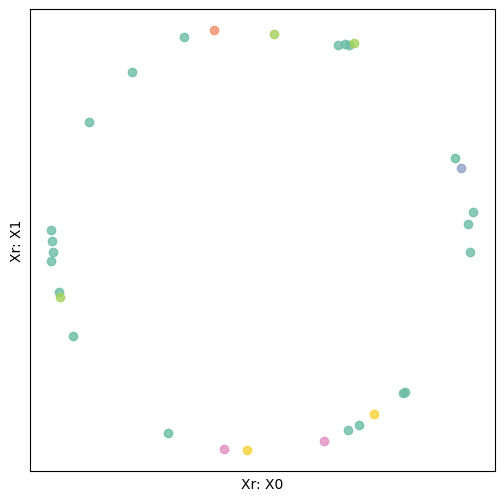

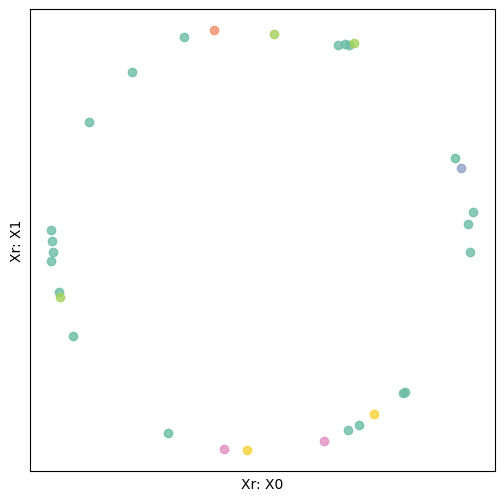

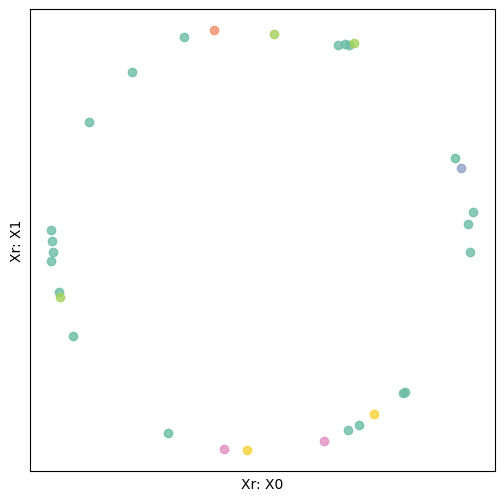

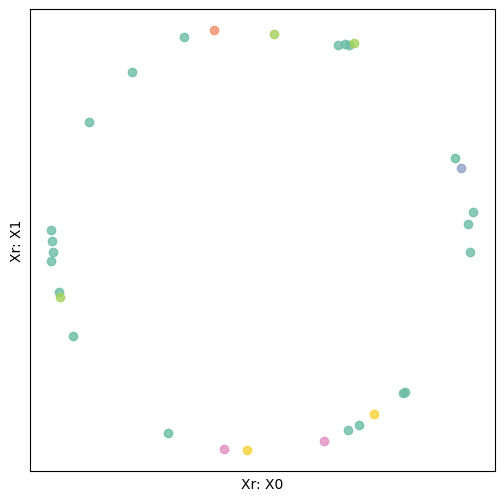

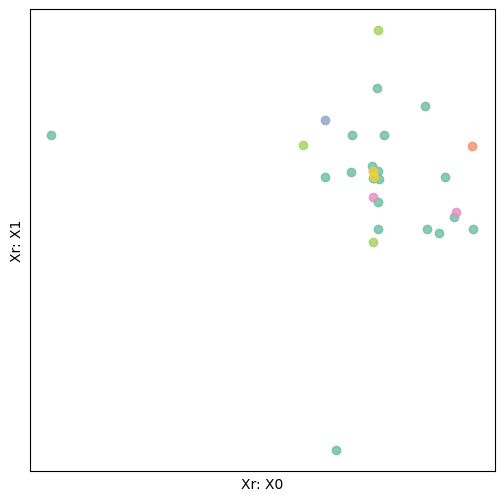

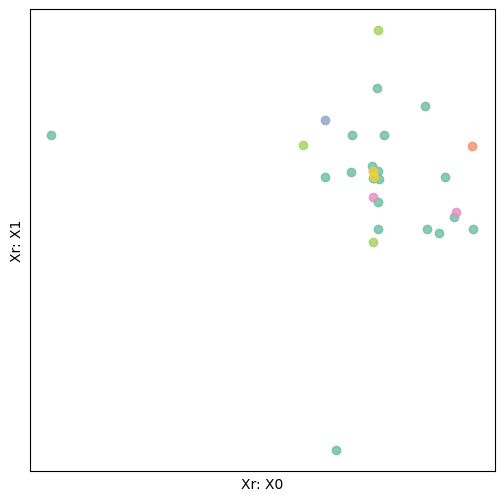

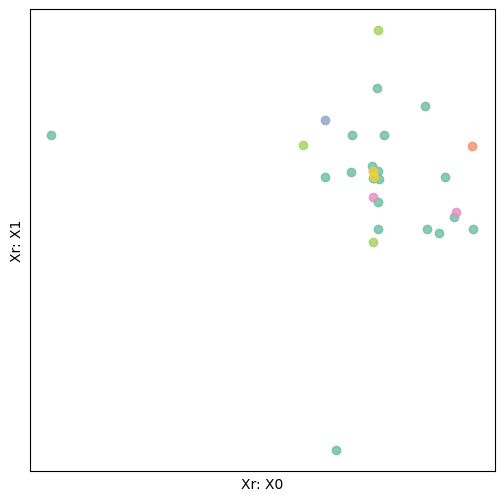

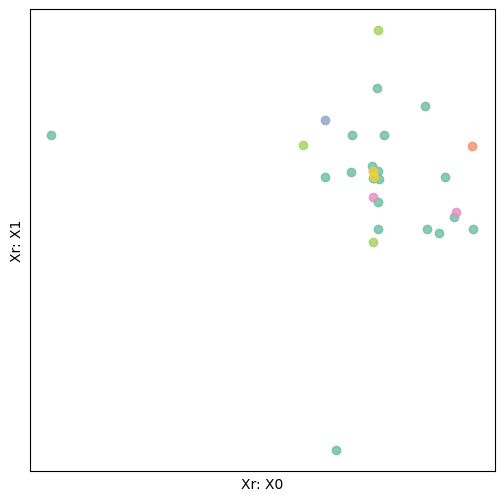

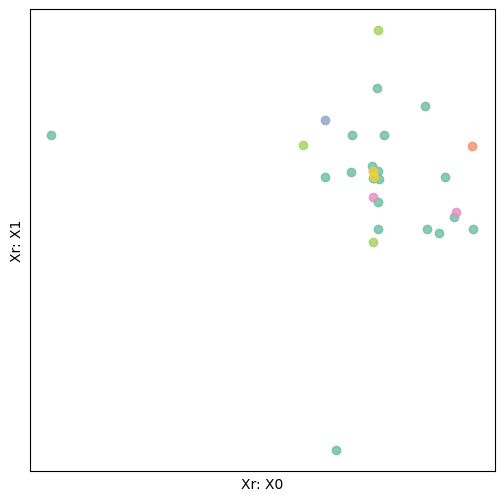

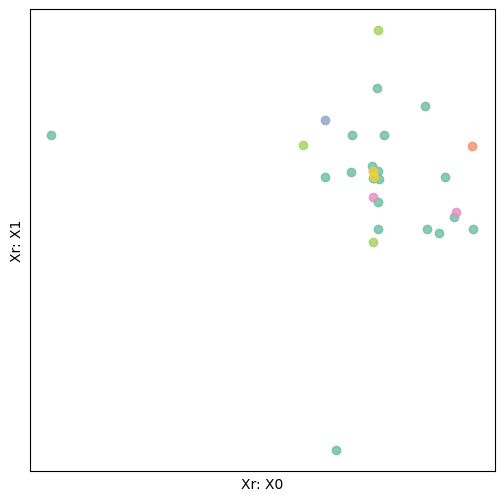

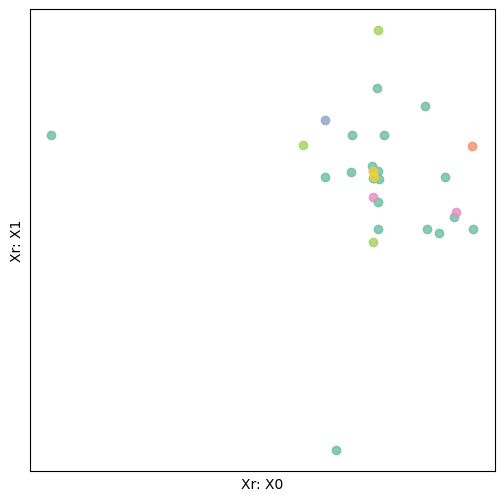

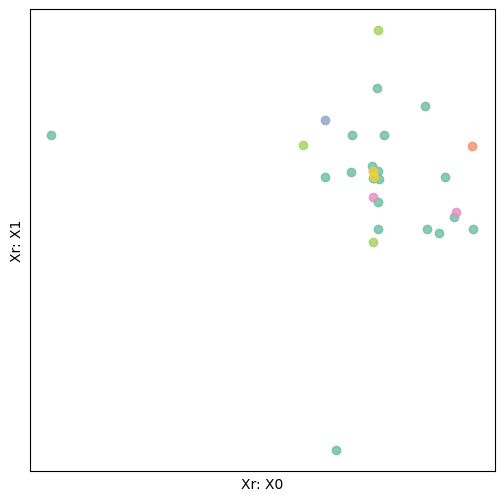

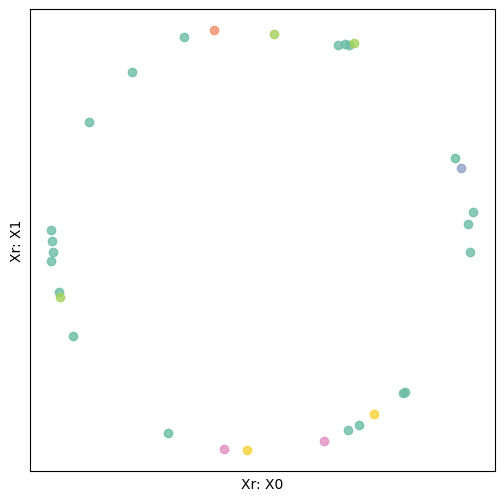

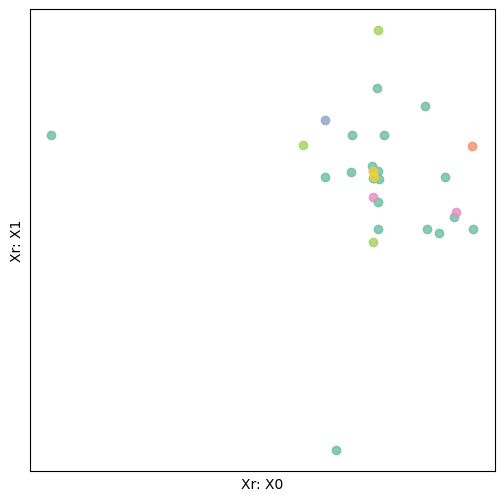

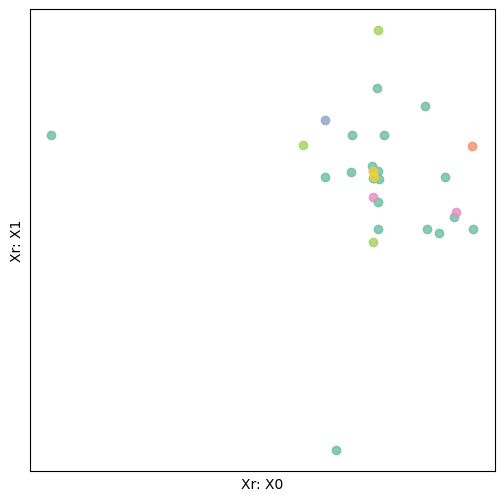

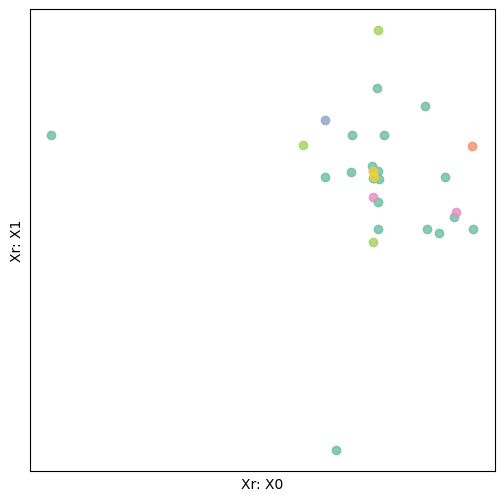

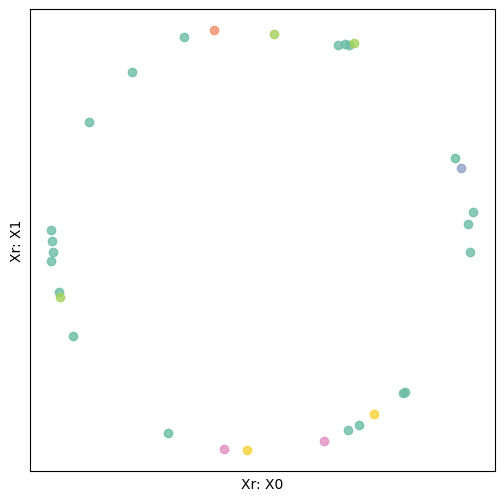

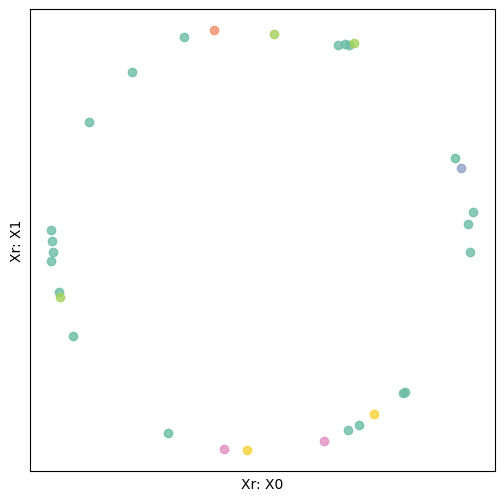

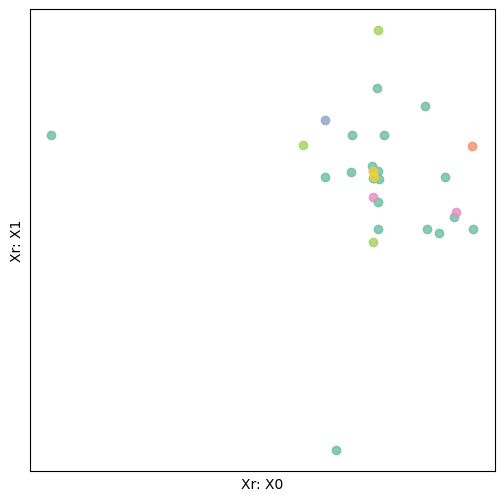

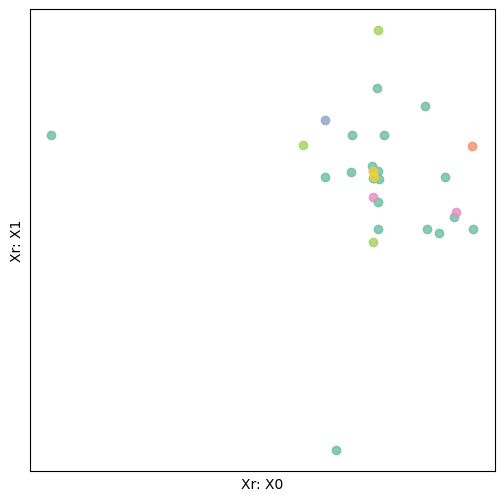

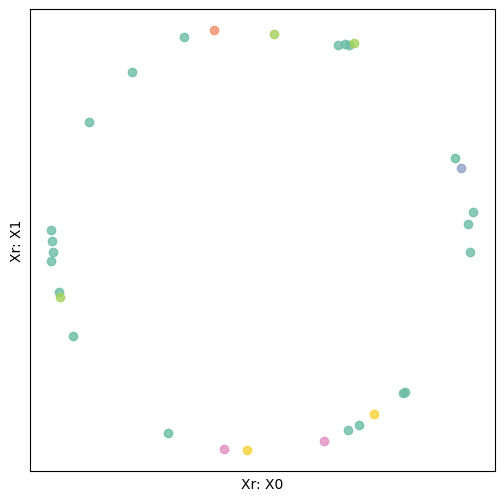

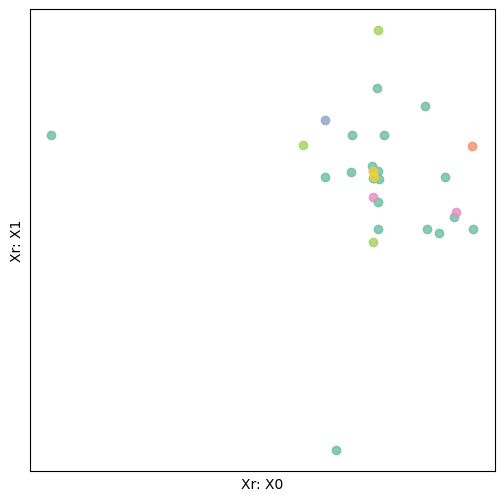

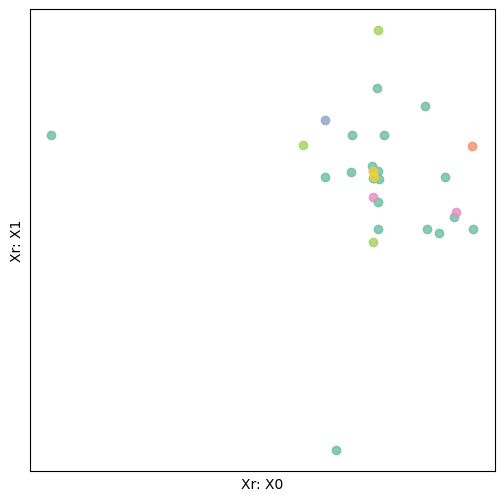

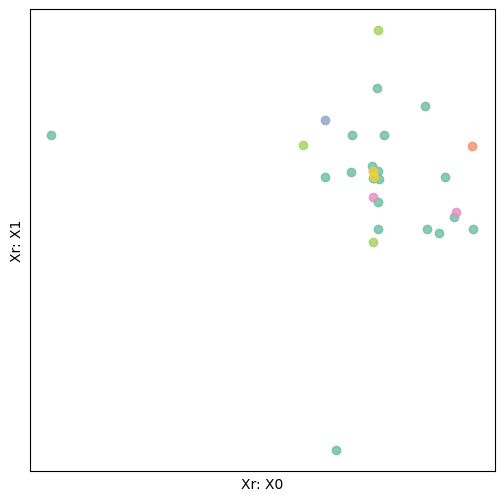

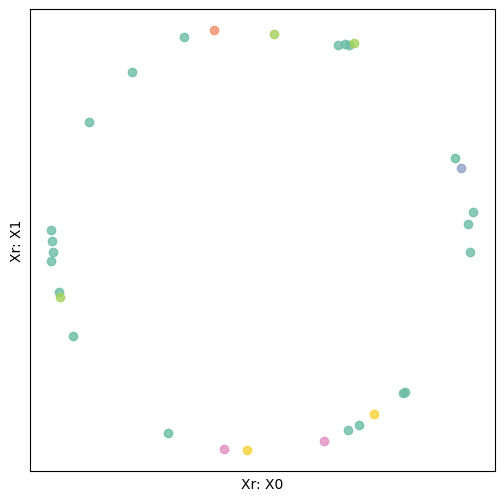

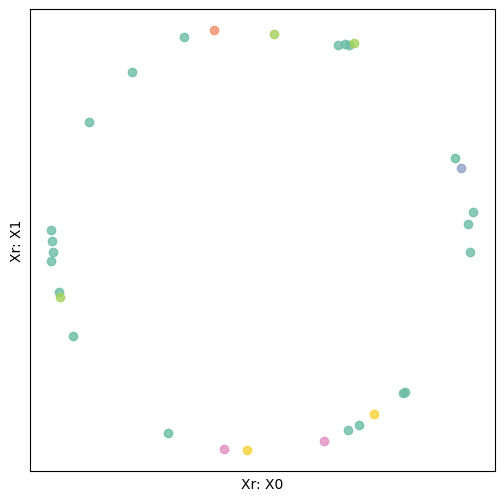

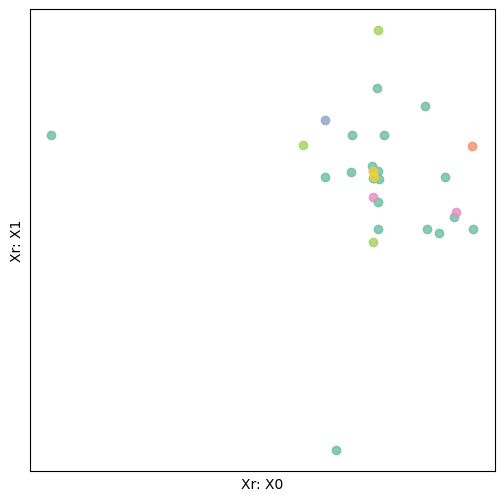

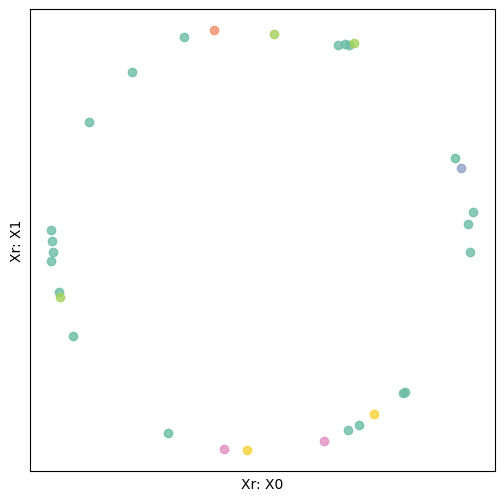

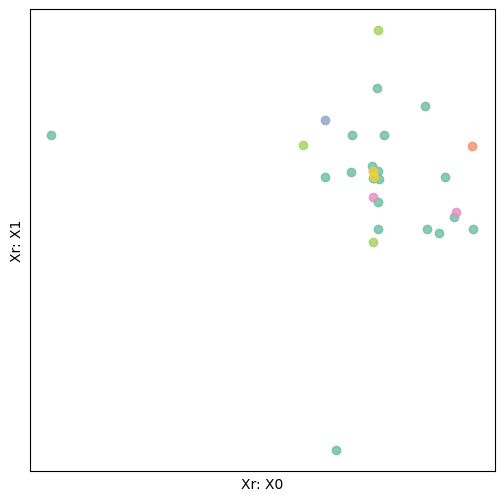

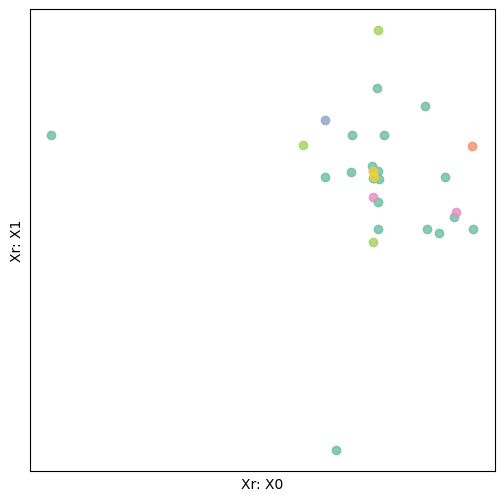

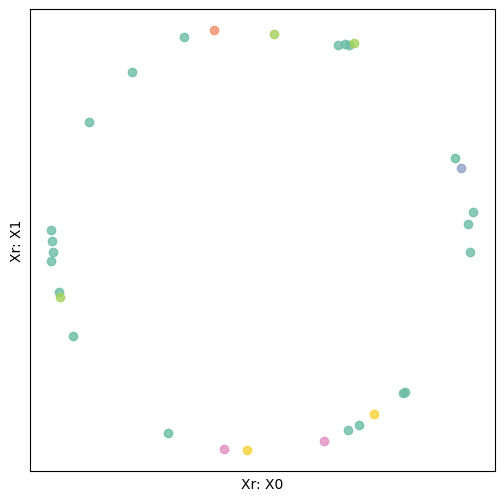

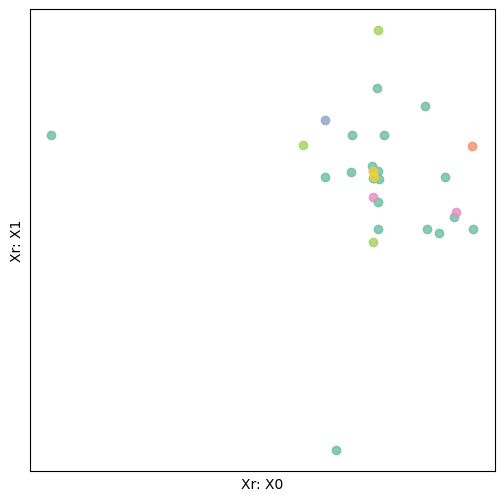

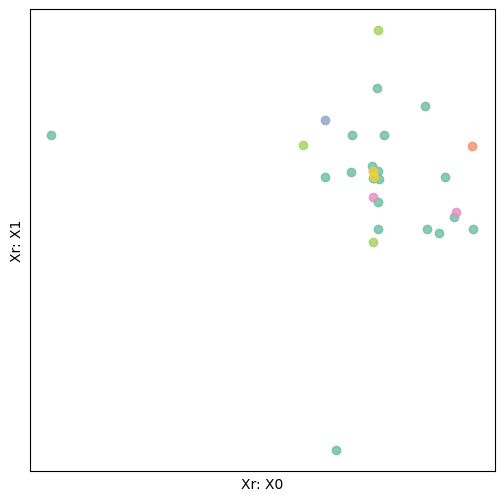

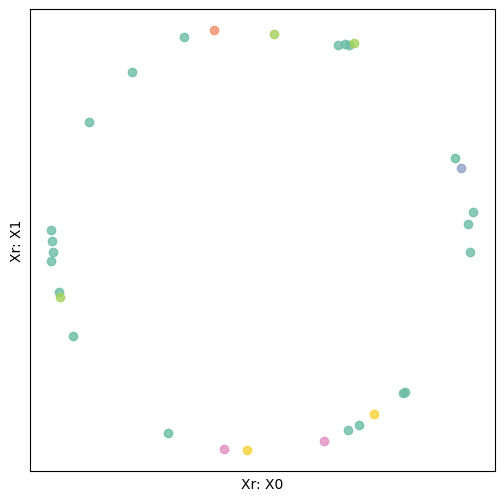

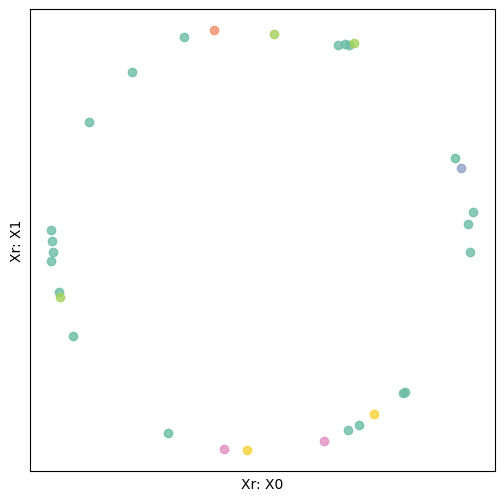

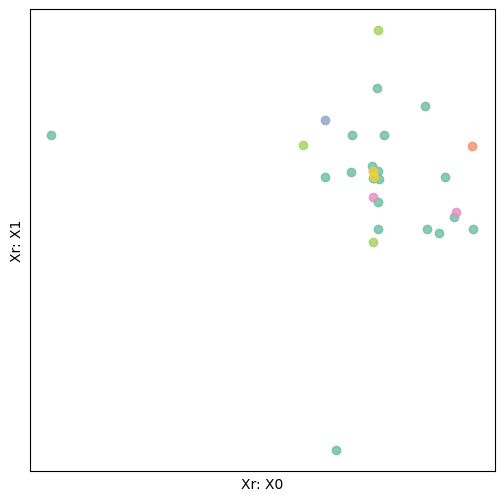

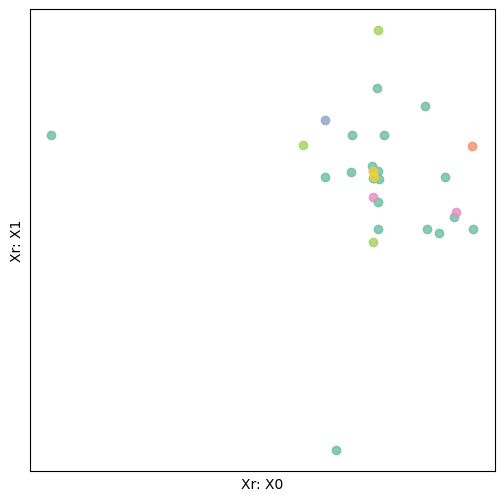

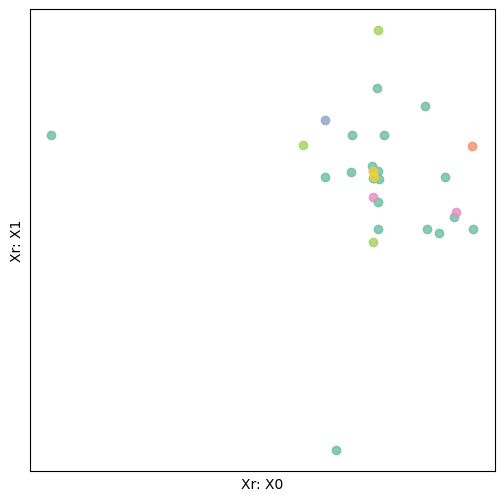

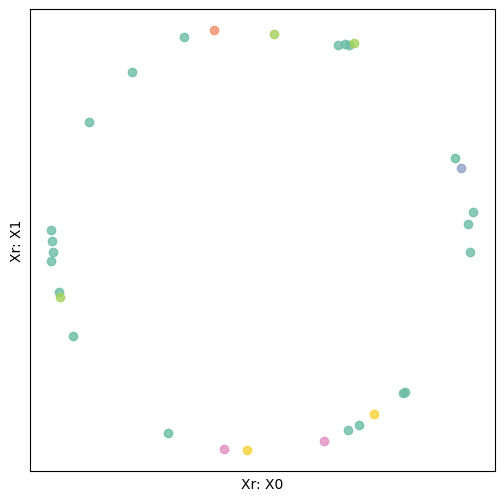

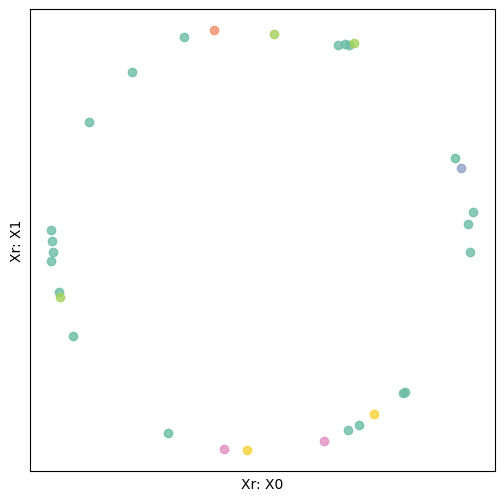

In [25]:

result_cluster_t=cluster_t_iter(expr_compressed_cp, result_cluster[0][6][1].labels_,param_sample_size=100)

In [4]:
! ls -lh /home/yuninze/res/uiop.zarr && \
  ls -lh /home/yuninze/res/uiop.zarr/result/ && \
  du -hcs /home/yuninze/res/uiop.zarr/*

total 52K
drwxrwxr-x 2 yuninze yuninze  20K 12월 14 19:03 expr
drwxrwxr-x 2 yuninze yuninze 4.0K 12월 14 19:03 ind
drwxrwxr-x 2 yuninze yuninze  20K 12월 14 19:03 name
drwxrwxr-x 6 yuninze yuninze 4.0K 12월 15 06:59 result
total 72K
drwxrwxr-x 2 yuninze yuninze 4.0K 12월 15 06:59 coord_2d
drwxrwxr-x 2 yuninze yuninze  20K 12월 14 23:16 expr_nonconstant
drwxrwxr-x 2 yuninze yuninze  40K 12월 15 02:29 expr_nonconstant_svd
drwxrwxr-x 2 yuninze yuninze 4.0K 12월 15 02:30 pca_coord
1.2G	/home/yuninze/res/uiop.zarr/expr
12K	/home/yuninze/res/uiop.zarr/ind
336M	/home/yuninze/res/uiop.zarr/name
483M	/home/yuninze/res/uiop.zarr/result
2.0G	total
